# Отбор признаков

В наших примерах мы будем работать с набором данных, содержащим информацию о случаях сахарного диабета среди индейцев Пима (Pima Indians diabetes). Все признаки являются числовыми, а задача представляет собой двухклассовую классификацию.

### Одномерный отбор признаков

In [83]:
import pandas
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

# load data
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv('pima-indians-diabetes.csv', names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
dataframe.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


В примере ниже используется критерий хи-квадрат (chi-squared test) для неотрицательных признаков, чтобы отобрать 4 лучших признака. Возможно использовать и другие критери. 

In [84]:
# feature extraction

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# summarize scores

print(fit.scores_)


[ 111.51969064 1411.88704064   17.60537322   53.10803984 2175.56527292
  127.66934333    5.39268155  181.30368904]


Мы видим оценки для каждого признака и 4 отобранных признака (с наивысшими оценками): plas, test, mass и age.

In [85]:
features = fit.transform(X)

# summarize selected features

print(features[:,:])

[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 ...
 [121.  112.   26.2  30. ]
 [126.    0.   30.1  47. ]
 [ 93.    0.   30.4  23. ]]


#### Проверим качество различных моделей при использовании данного набора признаков

In [86]:
model_1=LogisticRegression(solver='lbfgs')
model_2=ExtraTreesClassifier(n_estimators=100)
model_3=LinearSVC(C=0.005, penalty="l1", dual=False)

In [87]:
# load data
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv('pima-indians-diabetes.csv', names=names)

dataframe.head()


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Оставим только plas, test, mass и age

In [88]:
select1=dataframe[['plas','test','mass','age','class']]
select1.head()

,plas,test,mass,age,class
0,148,0,33.6,50,1
1,85,0,26.6,31,0
2,183,0,23.3,32,1
3,89,94,28.1,21,0
4,137,168,43.1,33,1


In [89]:
array = select1.values
X = array[:,0:4]
Y = array[:,4]

In [90]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


cv = KFold(n_splits=5, shuffle=True, random_state=123)
CV1=cross_val_score(model_1, X, Y, cv=cv)
CV2=cross_val_score(model_2, X, Y, cv=cv)
CV3=cross_val_score(model_3, X, Y, cv=cv)

print(CV1, np.mean(CV1))
print(CV2, np.mean(CV2))
print(CV3, np.mean(CV3))

[0.77922078 0.76623377 0.72077922 0.78431373 0.76470588] 0.7630506748153806
[0.73376623 0.68181818 0.7012987  0.77777778 0.79084967] 0.7371021135727018
[0.64935065 0.59090909 0.64935065 0.69281046 0.64052288] 0.6445887445887446


In [91]:
cv = KFold(n_splits=5, shuffle=True, random_state=123)
CV1=cross_val_score(model_1, features, Y, cv=cv)
CV2=cross_val_score(model_2, features, Y, cv=cv)
CV3=cross_val_score(model_3, features, Y, cv=cv)

print(CV1, np.mean(CV1))
print(CV2, np.mean(CV2))
print(CV3, np.mean(CV3))

[0.77922078 0.76623377 0.72077922 0.78431373 0.76470588] 0.7630506748153806
[0.71428571 0.7012987  0.69480519 0.75816993 0.77777778] 0.7292674645615822
[0.64935065 0.59090909 0.64935065 0.69281046 0.64052288] 0.6445887445887446


### Рекурсивное исключение признаков (Del)

In [123]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# load data

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv('pima-indians-diabetes.csv', names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [124]:
# feature extraction

model = LogisticRegression()

rfe = RFE(model, 4)

fit = rfe.fit(X, Y)

print("Num Features:", fit.n_features_)

print("Selected Features:", fit.support_)

print("Feature Ranking:", fit.ranking_)

Num Features: 4
Selected Features: [ True  True False False False  True  True False]
Feature Ranking: [1 1 2 4 5 1 1 3]


/Users/anastasiazuhba/anaconda3/envs/Py3ML/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anastasiazuhba/anaconda3/envs/Py3ML/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anastasiazuhba/anaconda3/envs/Py3ML/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anastasiazuhba/anaconda3/envs/Py3ML/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anastasiazuhba/anaconda3/envs/Py3ML/lib/python3.6/site-pa

In [125]:
newf=rfe.transform(X)

Мы видим, что в результате были отобраны 3 лучших признака: preg, mass, pedi. Отобранные признаки помечены значением «True» в массиве support_ и значением «1» в массиве ranking_.

#### Проверим качество различных моделей при использовании данного набора признаков

In [104]:
model_1=LogisticRegression(solver='lbfgs')
model_2=ExtraTreesClassifier(n_estimators=100)
model_3=LinearSVC(C=0.005, penalty="l1", dual=False)

In [126]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


cv = KFold(n_splits=5, shuffle=True, random_state=123)
CV1=cross_val_score(model_1, newf, Y, cv=cv)
CV2=cross_val_score(model_2, newf, Y, cv=cv)
CV3=cross_val_score(model_3, newf, Y, cv=cv)

print(CV1, np.mean(CV1))
print(CV2, np.mean(CV2))
print(CV3, np.mean(CV3))

[0.79220779 0.74675325 0.71428571 0.78431373 0.77777778] 0.7630676513029454
[0.77922078 0.74675325 0.73376623 0.75163399 0.81045752] 0.7643663526016468
[0.62987013 0.64285714 0.61038961 0.69281046 0.63398693] 0.6419828537475596


### Отбор на основе важности признаков

Ансамблевые алгоритмы на основе деревьев решений, такие как случайный лес (random forest), позволяют оценить важность признаков.

In [17]:
from sklearn.ensemble import ExtraTreesClassifier

# load data
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv('pima-indians-diabetes.csv', names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [133]:
# feature extraction

model = ExtraTreesClassifier(n_estimators=100)
model.fit(X, Y)
print(model.feature_importances_)

[0.10950645 0.24058156 0.09910031 0.07942243 0.07177902 0.14145044
 0.11887209 0.13928769]


In [132]:
dF=dict(zip(model.feature_importances_, names))
dF

{0.10839377719613692: 'preg',
 0.23542150837315595: 'plas',
 0.10185661003113684: 'pres',
 0.07813116447487366: 'skin',
 0.07156704484821948: 'test',
 0.14267107961796988: 'mass',
 0.11849173623613497: 'pedi',
 0.1434670792223723: 'age'}

In [137]:
import operator
sorted_x = sorted(dF.items(), key=operator.itemgetter(0))
print(sorted_x)

[(0.07156704484821948, 'test'), (0.07813116447487366, 'skin'), (0.10185661003113684, 'pres'), (0.10839377719613692, 'preg'), (0.11849173623613497, 'pedi'), (0.14267107961796988, 'mass'), (0.1434670792223723, 'age'), (0.23542150837315595, 'plas')]


#### Проверим качество различных моделей при использовании данного набора признаков

In [19]:
model_1=LogisticRegression(solver='lbfgs')
model_2=ExtraTreesClassifier(n_estimators=100)
model_3=LinearSVC(C=0.005, penalty="l1", dual=False)

In [20]:
# load data
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv('pima-indians-diabetes.csv', names=names)

dataframe.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
select3=dataframe[['plas', 'mass', 'pedi', 'age', 'class']]
select3.head()

,plas,mass,pedi,age,class
0,148,33.6,0.627,50,1
1,85,26.6,0.351,31,0
2,183,23.3,0.672,32,1
3,89,28.1,0.167,21,0
4,137,43.1,2.288,33,1


In [22]:
array = select3.values
X = array[:,0:4]
Y = array[:,4]

In [23]:
cv = KFold(n_splits=5, shuffle=True, random_state=123)
CV1=cross_val_score(model_1, X, Y, cv=cv)
CV2=cross_val_score(model_2, X, Y, cv=cv)
CV3=cross_val_score(model_3, X, Y, cv=cv)

print(CV1, np.mean(CV1))
print(CV2, np.mean(CV2))
print(CV3, np.mean(CV3))

[0.77272727 0.76623377 0.73376623 0.79084967 0.81045752] 0.7748068924539512
[0.75324675 0.72727273 0.71428571 0.79084967 0.77777778] 0.7526865291571173
[0.63636364 0.57142857 0.64285714 0.7124183  0.63398693] 0.6394109158815041


### Метод главных компонент

In [138]:
from sklearn.decomposition import PCA

# load data
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv('pima-indians-diabetes.csv', names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [139]:
# feature extraction

pca = PCA(n_components=4)
fit = pca.fit(X)
features = fit.transform(X)

# summarize components

print("Explained Variance:",fit.explained_variance_ratio_)
print(features[:,:])

Explained Variance: [0.88854663 0.06159078 0.02579012 0.01308614]
[[-75.71465491 -35.95078264  -7.26078895  15.66926931]
 [-82.3582676   28.90821322  -5.49667139   9.00455376]
 [-74.63064344 -67.90649647  19.46180812  -5.65305642]
 ...
 [ 32.11319827   3.3766648   -1.58786446  -0.87844546]
 [-80.21449431 -14.18601977  12.3512639  -14.29425948]
 [-81.30814972  21.62149606  -8.15276833  13.82170554]]


#### Проверим качество различных моделей при использовании данного набора признаков

In [140]:
model_1=LogisticRegression(solver='lbfgs')
model_2=ExtraTreesClassifier(n_estimators=100)
model_3=LinearSVC(C=0.005, penalty="l1", dual=False)

In [141]:
X=features

In [142]:
cv = KFold(n_splits=5, shuffle=True, random_state=123)
CV1=cross_val_score(model_1, X, Y, cv=cv)
CV2=cross_val_score(model_2, X, Y, cv=cv)
CV3=cross_val_score(model_3, X, Y, cv=cv)

print(CV1, np.mean(CV1))
print(CV2, np.mean(CV2))
print(CV3, np.mean(CV3))

[0.75974026 0.71428571 0.69480519 0.76470588 0.75163399] 0.7370342076224429
[0.69480519 0.68181818 0.71428571 0.73856209 0.69281046] 0.7044563279857398
[0.78571429 0.72727273 0.7012987  0.75163399 0.75163399] 0.7435107376283847


### L1-регуляризация

In [163]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
# load data
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv('pima-indians-diabetes.csv', names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
X.shape

(768, 8)

In [165]:
lsvc = LinearSVC(C=0.003, penalty="l1", dual=False).fit(X, Y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

(768, 4)

#### Проверим качество различных моделей при использовании данного набора признаков

In [166]:
model_1=LogisticRegression(solver='lbfgs')
model_2=ExtraTreesClassifier(n_estimators=100)
model_3=LinearSVC(C=0.005, penalty="l1", dual=False)

In [167]:
X=X_new

In [168]:
cv = KFold(n_splits=5, shuffle=True, random_state=123)
CV1=cross_val_score(model_1, X, Y, cv=cv)
CV2=cross_val_score(model_2, X, Y, cv=cv)
CV3=cross_val_score(model_3, X, Y, cv=cv)

print(CV1, np.mean(CV1))
print(CV2, np.mean(CV2))
print(CV3, np.mean(CV3))

[0.77272727 0.74675325 0.68181818 0.77777778 0.77777778] 0.7513708513708514
[0.77272727 0.70779221 0.66233766 0.73202614 0.74509804] 0.7239962651727357
[0.68831169 0.62987013 0.64935065 0.71895425 0.69281046] 0.675859434682964


PCA не совсем метод отбора признаков. Это метот снижения размерности.

# Методы снижения размерности

In [169]:
import os
import time
import warnings
import datetime
import numpy as np
import pandas as pd
import random as rnd
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier

import pylab

from matplotlib import pyplot
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
import seaborn as sns

sns.set_context("notebook", font_scale=1.5)
import random
from IPython.display import Image, SVG

%matplotlib inline


## $$ g(x, \alpha) = \sum_{i}^{n} \alpha_i f_i(x) $$
## $$ Q(\alpha) = \| F\alpha - y \|^2 $$

Solution

## $$ \alpha^{*} = (F^{T}F)^{-1}F^{T}y = F^{+}y $$
## $$ Q(\alpha^{*}) = \| P_{F}y - y \|^2 $$
## $$ P_{F} = FF^{+} $$

See <a href='http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf'> К.В. Воронцов, Методы машинного обучения по прецедентам </a>
* глава 5.3 Линейная регрессия

---------
<h1 align="center"> PCA, SVD 

## Задача PCA

#### PCA

## $$ \| G U^{T} - F \|^2 \to \min_{G, U} $$

$$ dim F = (\ell \times n),~~~ dim G = (\ell \times m),~~~ dim U = (n\times m) $$ 
---------
<img src="pic/fig_pca_PCA.png" width="600">

#### SVD

## $$ F = V D U^{T} $$


## $$ F^{+} = U D^{-1} V^{T} $$

**Воспрос**: Как связаны решение задачи PCA и SVD? 

Если $m = n$, тогда 
## $$ F = G U^{T} = V D U^{T} $$

Если $m\geq rank(F)$

**Воспрос**: Как связаны собственные числа $\lambda_1,\dots, \lambda_m$, отвечающие главным компонентам, и ошибка приближения матрицы признаков (explained variance) 
## $$\| G U^{T} - F \|^2 ?$$

## PCA for Classifiaction

In [170]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA

from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.7)

In [171]:
from sklearn.datasets import load_iris


iris = load_iris()

cv_strategy = ShuffleSplit(iris.data.shape[0], random_state=33, test_size=0.1)

estimator = Pipeline([
    ('reduce_dim', PCA(n_components=2)),
    ('svm', SVC(kernel="linear")),
])
print("SVM:", cross_val_score(SVC(kernel="linear"), iris.data, iris.target, scoring='accuracy', cv=cv_strategy).mean())
print("PCA+SVM:", cross_val_score(estimator, iris.data, iris.target, scoring='accuracy', cv=cv_strategy).mean())

SVM: 0.9777777777777779
PCA+SVM: 0.9600000000000002


In [172]:
from sklearn.datasets import load_digits

digits = load_digits()

cv_strategy = ShuffleSplit(digits.data.shape[0], random_state=33, test_size=0.2)

estimator = Pipeline([
    ('reduce_dim', PCA(n_components=40)),
    ('svm', SVC(kernel="linear")),
])

for estimator_ in [SVC(kernel="linear"), estimator]:
    scoring = cross_val_score(estimator_, digits.data, digits.target, scoring='accuracy', cv=cv_strategy)
    print(scoring.mean(), scoring.std())

0.9787392567860013 0.007159219903322391
0.978859828108576 0.007183355062965293


In [63]:
# One more example - eigen faces
from IPython.display import IFrame
IFrame(src="http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-pyhttp://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py", width=800, height=400)

-------
<h1 align="center">tSNE</h1> 
## Идея tSNE
Laurens, Hinton Visualizing Data using t-SNE, 2008
---------
<img src="pic/Lle_hlle_swissroll.png" width="600">



### Пример
** tSNE превносит дополнительную интепретацию в данные!!! **
http://distill.pub/2016/misread-tsne/

### tSNE vs PCA (MNIST)
http://yann.lecun.com/exdb/mnist/

Используется load_digits для упрощения

Загрузка данных (см выше)

Нарисуем примеры цифр из датасета load_digits

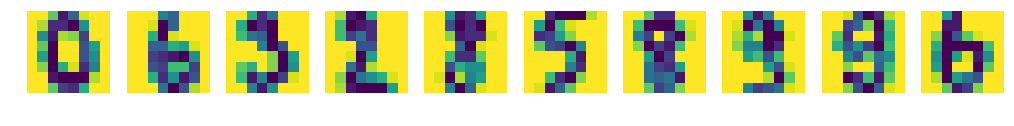

In [64]:
def plot_image(image_id, dataset=X_train, im_size=28):
    pylab.imshow(255-dataset[image_id,:].reshape(im_size, im_size))
    
def plot_grid(image_ids, nrows, ncols, dataset=X_train, im_size=8):
    fig = pyplot.gcf()
    fig.set_size_inches(17.5,15.5)
    for pylab_index, example_id in enumerate(image_ids):
        pylab.subplot(nrows, ncols, pylab_index + 1)
        plot_image(example_id, dataset, im_size)
        pylab.axis('off')
plot_grid(range(10), nrows=1, ncols=10)

In [65]:
def get_neighbors(example_img, X_minus_example, Y_minus_example, estimator):
    distances, indices = estimator.kneighbors(example_img, n_neighbors=10)
    distances, indices = distances[0], indices[0]
    
    df = pd.DataFrame()
    df['distances'], df['indices']  = distances, indices
    df['labels'] = Y_minus_example[indices]
    
    return df

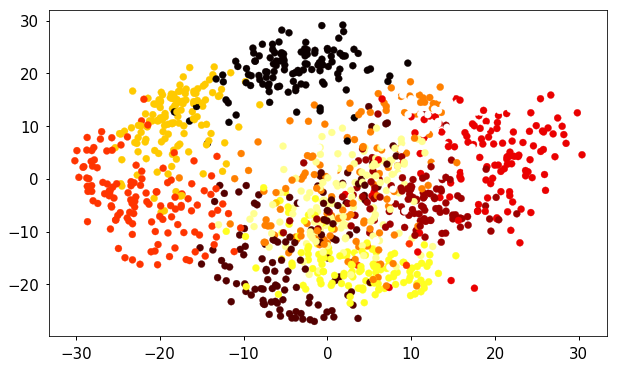

In [66]:
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
pyplot.figure(figsize=(10, 6))
pylab.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=Y_train, cmap=pyplot.cm.hot)

In [78]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_iter=250)
X_tsne = tsne.fit_transform(np.concatenate((X_train, X_test)))
X_train_tsne, X_test_tsne = X_tsne[:len(X_train)], X_tsne[len(X_train):]

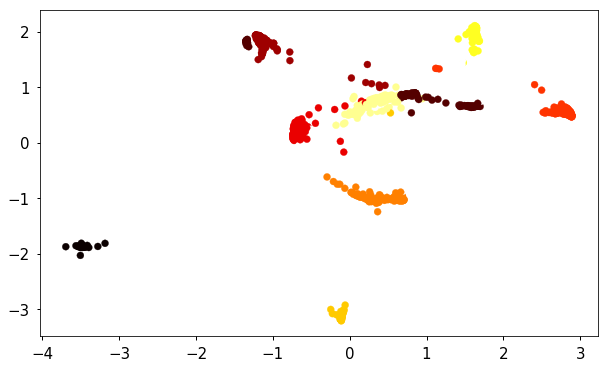

In [79]:
pyplot.figure(figsize=(10, 6))
pylab.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=Y_train, cmap=pyplot.cm.hot)

In [80]:
# KNN_PCA2d vs KNN_TSNE2d

knn_pca = KNeighborsClassifier().fit(X_train_pca, Y_train)
y_pca = knn_pca.predict(X_test_pca)
print('knn pca accuracy_score=', accuracy_score(y_pca, Y_test))

knn pca accuracy_score= 0.6259259259259259


In [81]:
knn_tsne = KNeighborsClassifier().fit(X_train_tsne, Y_train)
y_tsne = knn_tsne.predict(X_test_tsne)
print('knn tsne accuracy_score =', accuracy_score(y_tsne, Y_test))

knn tsne accuracy_score = 0.9592592592592593


<h1 align="center">Conclusion</h1>  

**PRO PCA**:
 
 * PCA помогает избавиться от "лишних" размерностей
 * PCA строит оптимальное линейное преобразование
 * PCA применим для больших размерностей
 * существуют ядерные вариант PCA (KernelPCA)

**Cons PCA**
 * если требуется сложное нелинейное преобразование, PCA не работает
 * не подходит для визуализации на двухмерной плоскости при большой размерности исходных пространств

**PRO tSNE**:
 * отлично визуализируют (2D, 3D) данные
 * испольюзуются для предобрабтки данных, анализа структуры данных
       
**Cons tSNE**
  * стохастичность (PCA детерминирован)
  * неинтерпретируемость данных
  * не применим (сложно применим) для новых данных
  * не даёт ответ об оптимальной размерности пространства
